# Interpolation and Gaussian quadrature


Consider integration
$$
\int_a^b f(x) w(x) {\rm d}x.
$$
For periodic integration we approximated (using the Trapezium rule) an integral by a sum.
We can think of it as a weighted sum:
$$
{1 \over 2π} \int_0^{2π} f(θ) {\rm d} θ ≈  ∑_{j=0}^{n-1} w_j f(θ_j)
$$
where $w_j = 1/n$. Replacing an integral by a weighted sum is a known as a _quadrature_ rule.
This quadrature rule had several important properties:
1. It was _exact_ for integrating trigonometric polynomials with 2n-1 coefficients
$$
p(θ) = \sum_{k=1-n}^{n-1} p̂_k \exp({\rm i}k θ)
$$
as seen by the formula
$$
∑_{j=0}^{n-1} w_j f(θ_j) = p̂_0^n = … + p̂_{n-1} + p̂_0 + p̂_n + ⋯ = p̂_0 = {1 \over 2π} \int_0^{2π} p(θ) {\rm d} θ
$$
2. It exactly recovered the coefficients ($p̂_k^n = p̂_k$) for expansions of trigonometric polynomials with $n$ coeffiicents:
$$
p(θ) = \sum_{k=-⌈(n-1)/2⌉}^{⌊(n-1)/2⌋} p̂_k \exp({\rm i}k θ)
$$
3. It converged fast for smooth, periodic functions $f$.

In this section we consider other quadrature rules
$$
\int_a^b f(x) w(x) {\rm d}x ≈ \sum_{j=1}^n w_j f(x_j)
$$
We want to choose $w_j$ and $x_j$ so that the following properties are satisfied:
1. It is _exact_ for integrating polynomials up to degree $2n-1$:
$$
p(θ) = \sum_{k=0}^{2n-1} c_k q_k(x)
$$
2. It exactly recovers the coefficients for expansions:
$$
p(θ) = \sum_{k=0}^{n-1} c_k q_k(x)
$$
3. It converges fast for smooth functions $f$.
We will focus on properties (1) and (2) as property (3) is more involved.



1. Polynomial Interpolation: we describe how to interpolate a function by a polynomial.
2. Interpolatory quadrature rule: polynomial interpolation leads naturally to ways to integrate
functions, but onely realisable in the simplest cases.
3. Truncated Jacobi matrices: we see that truncated Jacobi matrices are diagonalisable
in terms of orthogonal polynomials and their zeros. 
3. Gaussian quadrature: Using roots of orthogonal polynomials and truncated Jacobi matrices 
leads naturally to an efficiently
computable interpolatory quadrature rule. The _miracle_ is its exact for twice as many polynomials as
expected.



## 1. Polynomial Interpolation

We already saw a special case of polynomial interpolation, where we saw that the polynomial
$$
f(z) ≈ ∑_{k=0}^{n-1} f̂_k^n z^k
$$
equaled $f$ at evenly spaced points on the unit circle: ${\rm e}^{{\rm i} 2π j/n}$. 
But here we consider the following:

**Definition (interpolatory polynomial)** Given $n$ distinct points $x_1,…,x_n ∈ ℝ$ 
and $n$ _samples_ $f_1,…,f_n ∈ ℝ$, a degree $n-1$
_interpolatory polynomial_ $p(x)$ satisfies
$$
p(x_j) = f_j
$$

The easiest way to solve this problem is to invert the Vandermonde system:

**Definition (Vandermonde)** The _Vandermonde matrix_ associated with $n$ distinct points $x_1,…,x_n ∈ ℝ$
is the matrix
$$
V := \begin{bmatrix} 1 & x_1 & ⋯ & x_1^{n-1} \\
                    ⋮ & ⋮ & ⋱ & ⋮ \\
                    1 & x_n & ⋯ & x_n^{n-1}
                    \end{bmatrix}
$$

**Proposition (interpolatory polynomial uniqueness)** 
The interpolatory polynomial is unique, and the Vandermonde matrix is invertible.

**Proof**
Suppose $p$ and $p̃$ are both interpolatory polynomials. Then $p(x) - p̃(x)$ vanishes at $n$ distinct points $x_j$. By the fundamental theorem of
algebra it must be zero, i.e., $p = p̃$.

For the second part, if $V 𝐜 = 0$ for $𝐜 ∈ ℝ$ then for $q(x) = c_1 + ⋯ + c_n x^{n-1}$ we have
$$
q(x_j) = 𝐞_j^⊤ V 𝐜 = 0
$$
hence $q$ vanishes at $n$ distinct points and is therefore 0, i.e., $𝐜 = 0$.

∎

Thus a quick-and-dirty way to to do interpolation is to invert the Vandermonde matrix
(which we saw in the least squares setting with more samples then coefficients):

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


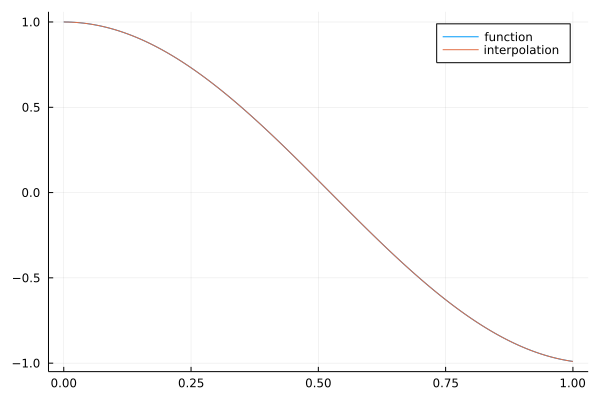

In [1]:
using Plots, LinearAlgebra
f = x -> cos(3x)
n = 10

x = range(0, 1; length=n-1)# evenly spaced points (BAD for interpolation)
V = x .^ (0:n-1)' # Vandermonde matrix
c = V \ f.(x) # coefficients of interpolatory polynomial
p = x -> dot(c, x .^ (0:n-1))

g = range(0,1; length=1000) # plotting grid
plot(g, f.(g); label="function")
plot!(g, p.(g); label="interpolation")

But it turns out we can also construct the interpolatory polynomial directly.
We will use the following with equal $1$ at one grid point
and are zero at the others:

**Definition (Lagrange basis polynomial)** The _Lagrange basis polynomial_ is defined as
$$
ℓ_k(x) := ∏_{j ≠ k} {x-x_j \over x_k - x_j} =  {(x-x_1) ⋯(x-x_{k-1})(x-x_{k+1}) ⋯ (x-x_n) \over (x_k - x_1) ⋯ (x_k - x_{k-1}) (x_k - x_{k+1}) ⋯ (x_k - x_n)}
$$

Plugging in the grid points verifies the following:

**Proposition (delta interpolation)**
$$
ℓ_k(x_j) = δ_{kj}
$$

We can use these to construct the interpolatory polynomial:

**Theorem (Lagrange interpolation)**
The unique  polynomial of degree at most $n-1$ that interpolates $f$ at $x_j$ is:
$$
p(x) = f(x_1) ℓ_1(x) + ⋯ + f(x_n) ℓ_n(x)
$$

**Proof**
Note that
$$
p(x_j) = ∑_{k=1}^n f(x_k) ℓ_k(x_j) = f(x_k)
$$
so we just need to show it is unique. Suppose $p̃(x)$ is a  polynomial
of degree at most $n-1$
that also interpolates $f$.


∎

**Example** We can interpolate $\exp(x)$ at the points $0,1,2$:
$$
p(x) = ℓ_1(x) + {\rm e} ℓ_2(x) + {\rm e}^2 ℓ_3(x) = 
{(x - 1) (x-2) \over (-1)(-2)} + {\rm e} {x (x-2) \over (-1)} + 
{\rm e}^2 {x (x-1) \over 2} = (1/2 - {\rm e} +{\rm e}^2/2)x^2  
-  (-3/2 + 2 {\rm e}  - {\rm e}^2 /2)  x + 1
$$


**Remark** Interpolating at evenly spaced points is a really **bad** idea:
interpolation is inheritely ill-conditioned. 
The problem sheet asks you to explore
this experimentally.

## 2. Interpolatory quadrature rules

**Definition (interpolatory quadrature rule)** Given a set of points $x_1,…,x_n$
the interpolatory quadrature rule is:
$$
Σ_n^{\rm i}[f] := ∑_{k=1}^n w_k f(x_k)
$$
where
$$
w_k := ∫_a^b ℓ_k(x) w(x) {\rm d} x
$$


**Proposition (interpolatory quadrature is exact for polynomials)** 
Interpolatory quadrature is exact for all degree $n-1$ polynomials $p$:
$$
∫_a^b p(x) w(x) {\rm d}x = Σ_n^{\rm i}[f]
$$

**Proof**
The result follows since, by uniqueness of interpolatory polynomial:
$$
p(x) = ∑_{k=1}^n p(x_k) ℓ_k(x)
$$

∎


## 3. Roots of orthogonal polynomials and truncated Jacobi matrices

The key to property (1) is to use _roots (zeros) of $q_n(x)$_.

**Lemma** $q_n(x)$ has exactly $n$ distinct roots.

**Proof**

Suppose $x_1, …,x_j$ are the roots where $q_n(x)$ changes sign, that is,
$$
q_n(x) = c_j (x-x_j) + O((x-x_j)^2)
$$
for $c_j ≠ 0$. Then
$$
q_n(x) (x-x_1) ⋯(x-x_j)
$$
does not change sign.
In other words:
$$
⟨q_n,(x-x_1) ⋯(x-x_j) ⟩ = \int_a^b q_n(x) (x-x_1) ⋯(x-x_j) {\rm d} x ≠ 0.
$$
This is only possible if $j = n$.

∎

**Definition (truncated Jacobi matrix)** Given a symmetric Jacobi matrix $X$,
(or the weight $w(x)$ whose orthonormal polynomials are associated with $X$)
 the _truncated Jacobi matrix_ is
$$
X_n := \begin{bmatrix} a_0 & b_0 \\
                         b_0 & ⋱ & ⋱ \\
                         & ⋱ & a_{n-2} & b_{n-2} \\
                         && b_{n-2} & a_{n-1} \end{bmatrix} ∈ ℝ^{n × n}
$$



**Lemma (zeros)** The zeros $x_1, …,x_n$ of $q_n(x)$ are the eigenvalues of the truncated Jacobi matrix $X_n$.
More precisely,
$$
X_n Q_n = Q_n \begin{bmatrix} x_1 \\ & ⋱ \\ && x_n \end{bmatrix}
$$
for the orthogonal matrix
$$
Q_n = \begin{bmatrix}
q_0(x_1) & ⋯ & q_0(x_n) \\
⋮  & ⋯ & ⋮  \\
q_{n-1}(x_1) & ⋯ & q_{n-1}(x_n)
\end{bmatrix} \begin{bmatrix} α_1^{-1} \\ & ⋱ \\ && α_n^{-1} \end{bmatrix}
$$
where $α_k = \sqrt{q_0(x_k)^2 + ⋯ + q_{n-1}(x_k)^2}$.

**Proof**

We construct the eigenvector (noting $b_{n-1} p_n(x_j) = 0$):
$$
X_n \begin{bmatrix} p_0(x_j) \\ ⋮ \\ p_{n-1}(x_j) \end{bmatrix} =
\begin{bmatrix} a_0 p_0(x_j) + b_0 p_1(x_j) \\
 b_0 p_0(x_j) + a_1 p_1(x_j) + b_1 p_2(x_j) \\
⋮ \\
b_{n-3} p_{n-3}(x_j) + a_{n-2} p_{n-2}(x_j) + b_{n-2} p_{n-1}(x_j) \\
b_{n-2} p_{n-2}(x_j) + a_{n-1} p_{n-1}(x_j) + b_{n-1} p_n(x_j)
\end{bmatrix} = x_j \begin{bmatrix} p_0(x_j) \\
 p_1(x_j) \\
⋮ \\
p_n(x_j)
\end{bmatrix}
$$
The result follows from normalising the eigenvectors. Since $X_n$ is symmetric
the eigenvector matrix is orthogonal.

∎



## 4. Gaussian quadrature

Gaussian quadrature is the interpolatory quadrature rule corresponding
to the grid $x_k$ defined as the roots of the orthogonal polynomial $q_n(x)$.
We shall see that it is exact for polynomials up to degree $2n-1$, i.e., double
the degree of other interpolatory quadrature rules from other grids.



**Definition (Gauss quadrature)** Given a weight $w(x)$, the Gauss quadrature rule is:
$$
∫_a^b f(x)w(x) {\rm d}x ≈ \underbrace{∑_{k=1}^n w_k f(x_k)}_{Σ_n^w[f]}
$$
where $x_1,…,x_n$ are the eigenvalues of $X_n$ and
$$
w_k = Q_n[k,1]^2 = {1 \over α_k^2}
$$

In analogy to how Fourier series are orthogonal with respect to Trapezium rule,
Orthogonal polynomials are orthogonal with respect to Gaussian quadrature:

**Lemma (Discrete orthogonality)**
For $0 ≤ ℓ,m ≤ n-1$,
$$
Σ_n^w[q_ℓ q_m] = δ_{ℓm}
$$

**Proof**
$$
Σ_n^w[q_ℓ q_m] = ∑_{k=1}^n {q_ℓ(x_k) q_m(x_k) \over α_k^2}
= \left[q_ℓ(x_1)/ α_1 | ⋯ | {q_ℓ(x_n)/ α_n}\right] 
\begin{bmatrix}
q_m(x_1)/α_1 \\
⋮ \\
q_m(x_n)/α_n \end{bmatrix} = 𝐞_ℓ Q_n Q_n^⊤ 𝐞_m = δ_{ℓm}
$$

∎

Just as approximating Fourier coefficients using Trapezium rule gives a way of
interpolating at the grid, so does Gaussian quadrature:

**Theorem (interpolation via quadrature)**
$$
f_n(x) = ∑_{k=0}^{n-1} c_k^n q_k(x)\hbox{ for } c_k^n := Σ_n^w[f q_k]
$$
interpolates $f(x)$ at the Gaussian quadrature points $x_1,…,x_n$.

**Proof**

Note that we can write:
$$
\begin{bmatrix}
c_0^n \\
⋮ \\
c_{n-1}^n \end{bmatrix} = Q_n^w \begin{bmatrix}
f_1 \\
⋮ \\
f_n \end{bmatrix}.
$$

Consider the Vandermonde-like matrix:
$$
Ṽ = \begin{bmatrix} q_0(x_1) & ⋯ & q_{n-1}(x_1) \\
                ⋮ & ⋱ & ⋮ \\
                q_0(x_n) & ⋯ & q_{n-1}(x_n) \end{bmatrix}
$$
Note that if $p(x) = [q_0(x) | ⋯ | q_{n-1}(x)] 𝐜$ then
$$
\begin{bmatrix}
p(x_1) \\
⋮ \\
p(x_n)
\end{bmatrix} = Ṽ 𝐜
$$
But we see that (similar to the Fourier case)
$$
Q_n^w Ṽ = \begin{bmatrix} Σ_n^w[q_0 q_0] & ⋯ & Σ_n^w[q_0 q_{n-1}]\\
                ⋮ & ⋱ & ⋮ \\
                Σ_n^w[q_{n-1} q_0] & ⋯ & Σ_n^w[q_{n-1} q_{n-1}]
                \end{bmatrix} = I_n
$$

∎

**Corollary** Gaussian quadrature is an interpolatory quadrature rule.



A consequence of being an interpolatory quadrature rule is that it is exact for all
polynomials of degree $n-1$. The _miracle_ of Gaussian quadrature is it is exact for twice
as many!



**Theorem (Exactness of Gauss quadrature)** If $p(x)$ is a degree $2n-1$ polynomial then
Gauss quadrature is exact:
$$
∫_a^b p(x)w(x) {\rm d}x = Σ_n^w[p].
$$

**Proof**
Using polynomial division algorithm (e.g. by matching terms) we can write
$$
p(x) = q_n(x) s(x) + r(x)
$$
where $s$ and $r$ are degree $n-1$. Then we have:
$$
Σ_n^w[p] = \undebrace{Σ_n^w[q_n s]}_{$0$ since evaluating $q_n$ at zeros} + Σ_n^w[r] = ∫_a^b r(x) w(x) {\rm d}x
= \underbrace{∫_a^b q_n(x)s(x) w(x) {\rm d}x}_{$0$ since $s$ is degree $<n$}  + ∫_a^b r(x) w(x) {\rm d}x = ∫_a^b p(x)w(x) {\rm d}x.
$$
∎